In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-music-genre/music_genre.csv


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [69]:
df = pd.read_csv('/kaggle/input/prediction-of-music-genre/music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [71]:
n_classes = df['music_genre'].nunique()

In [72]:
X = df.drop(['music_genre'], axis=1)
y = df['music_genre']

In [73]:
X_filtered = X.drop(['instance_id','artist_name','track_name', 'key', 'mode', 'obtained_date'], axis=1)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.1, random_state=42)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45004 entries, 29322 to 15795
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45000 non-null  float64
 1   acousticness      45000 non-null  float64
 2   danceability      45000 non-null  float64
 3   duration_ms       45000 non-null  float64
 4   energy            45000 non-null  float64
 5   instrumentalness  45000 non-null  float64
 6   liveness          45000 non-null  float64
 7   loudness          45000 non-null  float64
 8   speechiness       45000 non-null  float64
 9   tempo             45000 non-null  object 
 10  valence           45000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.1+ MB


In [76]:
X_train['tempo'] = pd.to_numeric(X_train['tempo'], errors='coerce')
X_test['tempo'] = pd.to_numeric(X_test['tempo'], errors='coerce')

In [77]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [78]:
kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)


In [79]:
X_train.values[:,0]

array([54., 52., 26., ..., 56., 27., 41.])

In [80]:
len(y_kmeans)

5001

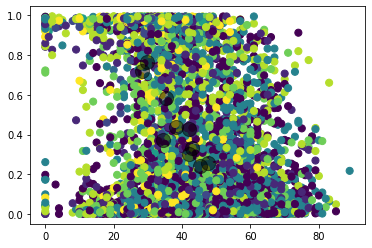

In [81]:
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);